# Dimensionality Reduction Exercises

## Introduction

We will be using customer data from a [Portuguese wholesale distributor](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers) for clustering. This data file is called `Wholesale_Customers_Data`.

It contains the following features:

* Fresh: annual spending (m.u.) on fresh products
* Milk: annual spending (m.u.) on milk products
* Grocery: annual spending (m.u.) on grocery products
* Frozen: annual spending (m.u.) on frozen products
* Detergents_Paper: annual spending (m.u.) on detergents and paper products
* Delicatessen: annual spending (m.u.) on delicatessen products
* Channel: customer channel (1: hotel/restaurant/cafe or 2: retail)
* Region: customer region (1: Lisbon, 2: Porto, 3: Other)

In this data, the values for all spending are given in an arbitrary unit (m.u. = monetary unit).

### Prerequisite packages
pandas
numpy
sklearn
seaborn
matplotlib


In [1]:
from __future__ import print_function
import os
# Set the data path as per your system path location for the data file
data_path = ['data']

## Question 1

* Import the data and check the data types.
* Drop the channel and region columns as they won't be used.
* Convert the remaining columns to floats if necessary.
* Copy this version of the data (using the `copy` method) to a variable to preserve it. We will be using it later.

In [2]:
!conda info -e

# conda environments:
#
base                     //anaconda3
abm                      //anaconda3/envs/abm
ai                       //anaconda3/envs/ai
aml                   *  //anaconda3/envs/aml
cr                       //anaconda3/envs/cr
dev                      //anaconda3/envs/dev
doom                     //anaconda3/envs/doom
doom1                    //anaconda3/envs/doom1
ds                       //anaconda3/envs/ds
fin                      //anaconda3/envs/fin
ibm                      //anaconda3/envs/ibm
in                       //anaconda3/envs/in
mern                     //anaconda3/envs/mern
net                      //anaconda3/envs/net
ps                       //anaconda3/envs/ps
python=3.7               //anaconda3/envs/python=3.7
react                    //anaconda3/envs/react
rsa                      //anaconda3/envs/rsa
sp                       //anaconda3/envs/sp
sp36                     //anaconda3/envs/sp36
sp37                     //anaconda3/envs/sp37
sp372     

In [63]:
import pandas as pd
import numpy as np

filepath = os.sep.join(data_path + ['Wholesale_Customers_Data.csv'])
data = pd.read_csv(filepath, sep=',')

In [38]:
data.shape

(440, 8)

In [39]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [65]:
data = data.drop(['Channel', 'Region'], axis=1)

In [66]:
data.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [67]:
# Convert to floats
data = data.astype('float64')

Preserve the original data.

In [68]:
data_orig = data.copy()
data_orig.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


## Question 2

As with the previous lesson, we need to ensure the data is scaled and (relatively) normally distributed.

* Examine the correlation and skew.
* Perform any transformations and scale data using your favorite scaling method.
* View the pairwise correlation plots of the new data.

In [44]:
data_corr = data.corr()

# Strip the diagonal for future examination
data_corr = data_corr.mask(np.tril(np.ones(data_corr.shape)).astype(np.bool))
data_corr = data_corr.stack().reset_index()
data_corr[0] = abs(data_corr[0])


#Ordering from max to min correlation
data_corr = data_corr.sort_values(by=0, ascending=False)

data_corr.columns = ['var1', 'var2', 'corr']
data_corr

,var1,var2,corr
10,Grocery,Detergents_Paper,0.924641
5,Milk,Grocery,0.728335
7,Milk,Detergents_Paper,0.661816
8,Milk,Delicassen,0.406368
13,Frozen,Delicassen,0.390947
2,Fresh,Frozen,0.345881
4,Fresh,Delicassen,0.244690
11,Grocery,Delicassen,0.205497
12,Frozen,Detergents_Paper,0.131525
6,Milk,Frozen,0.123994


As before, the two categories with their respective most strongly correlated variable.

In [45]:
data_corr.loc[data_corr['corr'] > 0.60]

,var1,var2,corr
10,Grocery,Detergents_Paper,0.924641
5,Milk,Grocery,0.728335
7,Milk,Detergents_Paper,0.661816


Examine the skew values and log transform. Looks like all of them need it.

In [46]:
#Examining the skew of values
data_skew = data.skew().sort_values(ascending=False)
data_skew

Delicassen          11.151586
Frozen               5.907986
Milk                 4.053755
Detergents_Paper     3.631851
Grocery              3.587429
Fresh                2.561323
dtype: float64

In [47]:
# The log transformations
data = np.log1p(data)


Scale the data again. Let's use `MinMaxScaler` this time just to mix things up.

In [48]:
from sklearn.preprocessing import MinMaxScaler

# Creating MinMax Scaler instance
mms = MinMaxScaler()

# Data_scaled and fitting/transforming data
data_scaled = mms.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, index=data.index, columns=data.columns)

data_scaled.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,0.717341,0.570536,0.701962,0.521374,0.585591,0.562722
std,0.143597,0.150513,0.110581,0.165226,0.185197,0.137780
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.650511,0.461063,0.625644,0.432167,0.451281,0.492789
50%,0.748157,0.580957,0.704455,0.524973,0.576324,0.584293
75%,0.815406,0.676252,0.784708,0.633904,0.746228,0.651758
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Visualize the relationship between the variables.

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.732813,8.121615,8.442205,7.303128,6.791781,6.671094
std,1.470618,1.080635,1.111523,1.281888,1.709519,1.293960
min,1.386294,4.025352,1.386294,3.258097,1.386294,1.386294
25%,8.048378,7.335633,7.675081,6.611024,5.551989,6.014321
50%,9.048404,8.196435,8.467267,7.331043,6.706242,6.873680
75%,9.737123,8.880619,9.273948,8.176177,8.274596,7.507278
max,11.627610,11.205027,11.437997,11.016496,10.617123,10.777789


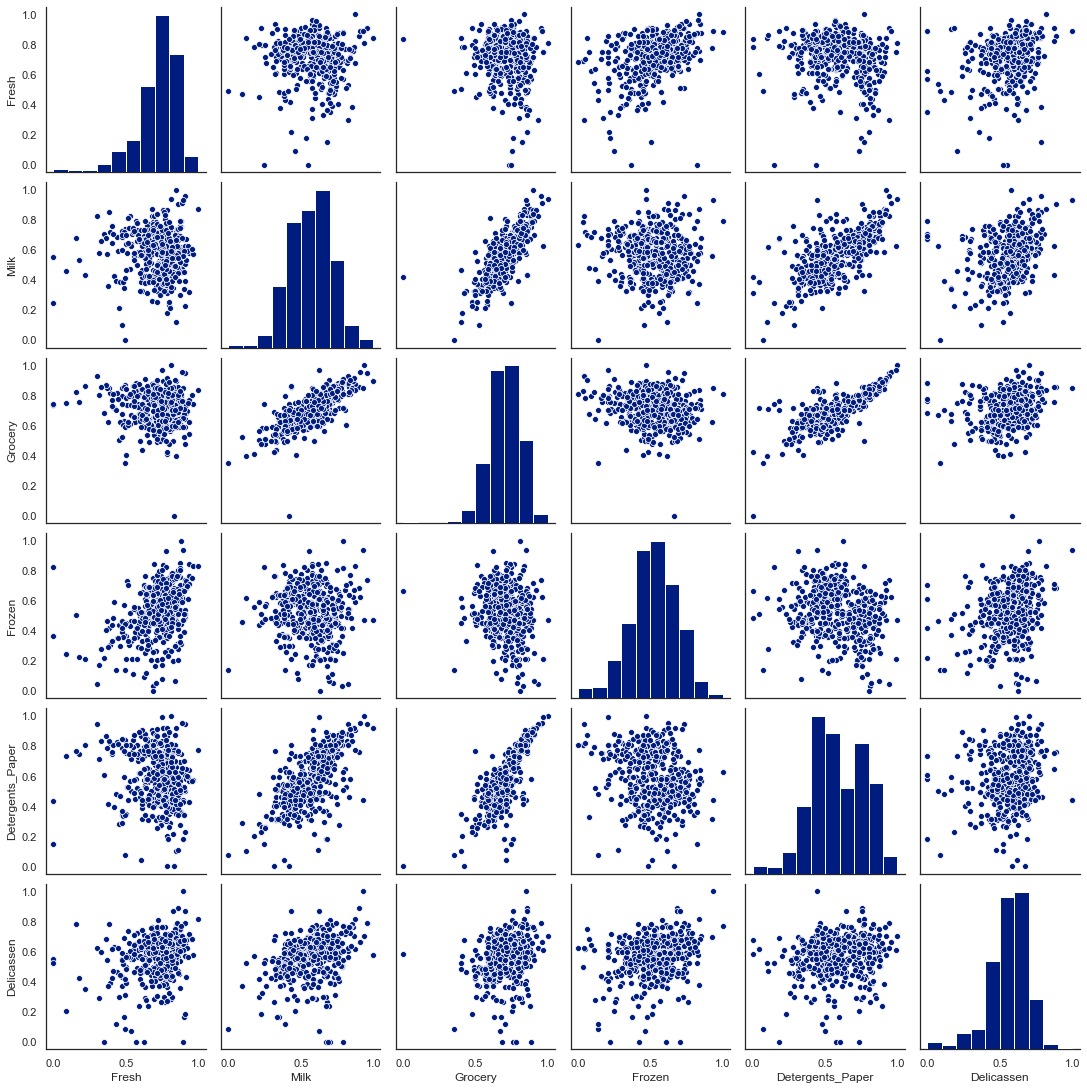

In [34]:
sns.set_context('notebook')
sns.set_palette('dark')
sns.set_style('white')

sns.pairplot(data_scaled);

## Question 3

* Using Scikit-learn's [pipeline function](http://scikit-learn.org/stable/modules/pipeline.html), recreate the data pre-processing scheme above (transformation and scaling) using a pipeline. If you used a non-Scikit learn function to transform the data (e.g. NumPy's log function), checkout  the custom transformer class called [`FunctionTransformer`](http://scikit-learn.org/stable/modules/preprocessing.html#custom-transformers).
* Use the pipeline to transform the original data that was stored at the end of question 1.
* Compare the results to the original data to verify that everything worked.

*Hint:* Scikit-learn has a more flexible `Pipeline` function and a shortcut version called `make_pipeline`. Either can be used. Also, if different transformations need to be performed on the data, a [`FeatureUnion`](http://scikit-learn.org/stable/modules/pipeline.html#featureunion-composite-feature-spaces) can be used.

In [69]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline, make_pipeline

# The custom NumPy log transformer
transformer = FunctionTransformer(np.log1p)

# The pipeline
# pipe_components = [('transformer', transformer), ('min-max scaler', MinMaxScaler())]
pipe = make_pipeline(transformer, MinMaxScaler())


# Convert the original data
data = pipe.fit_transform(data)
data = pd.DataFrame(data, index=data_orig.index, columns=data_orig.columns)

The results are identical. Note that machine learning models and grid searches can also be added to the pipeline (and in fact, usually are.)

In [74]:
print('Skew of data_scaled without Pipeline :\n', data_scaled.skew() )
print('Skew of data with Pipeline :\n', data.skew() )

Skew of data_scaled without Pipeline :
 Fresh              -1.575326
Milk               -0.224063
Grocery            -0.674938
Frozen             -0.352655
Detergents_Paper   -0.235961
Delicassen         -1.091827
dtype: float64
Skew of data with Pipeline :
 Fresh              -1.575326
Milk               -0.224063
Grocery            -0.674938
Frozen             -0.352655
Detergents_Paper   -0.235961
Delicassen         -1.091827
dtype: float64


## Question 4

* Perform PCA with `n_components` ranging from 1 to 5. 
* Store the amount of explained variance for each number of dimensions.
* Also store the feature importance for each number of dimensions. *Hint:* PCA doesn't explicitly provide this after a model is fit, but the `components_` properties can be used to determine something that approximates importance. How you decided to do so is entirely up to you.
* Plot the explained variance and feature importances.

In [90]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):
    
    # Create and fit the model
    pca = PCA(n_components=n)
    pca.fit(data)
    
    # Store the model and variance
    pca_list.append(pd.Series({'n': n, 'model': pca, 'var': pca.explained_variance_ratio_.sum()}))
    
    # Calculate and store feature importances
    abs_feat_values = np.abs(pca.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n': n, 
                                             'features': data.columns, 
                                             'values': abs_feat_values/abs_feat_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.448011
2,PCA(n_components=2),0.72099
3,PCA(n_components=3),0.827534
4,PCA(n_components=4),0.923045
5,PCA(n_components=5),0.979574


Create a table of feature importances for each data column.

In [100]:
feat_import_df = pd.concat(feature_weight_list).pivot(index='n', columns='features', values='values')
feat_import_df

features,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
n,,,,,,
1,0.071668,0.335487,0.060620,0.095979,0.190236,0.246010
2,0.151237,0.177519,0.158168,0.222172,0.112032,0.178872
3,0.165518,0.145815,0.211434,0.268363,0.084903,0.123967
4,0.224259,0.149981,0.239527,0.214275,0.070971,0.100987
5,0.211840,0.182447,0.196382,0.178104,0.067338,0.163888


Create a plot of explained variances.

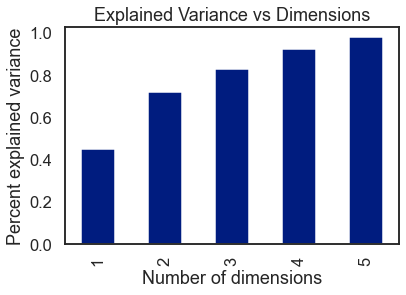

In [101]:
sns.set_context('talk')

ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

And here's a plot of feature importances.

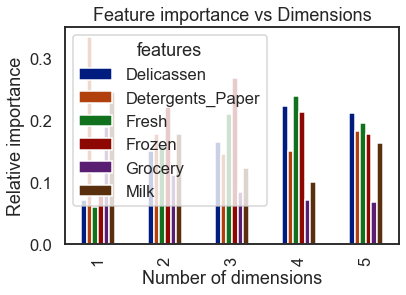

In [103]:
ax = feat_import_df.plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

## Question 5

* Fit a `KernelPCA` model with `kernel='rbf'`. You can choose how many components and what values to use for the other parameters.
* If you want to tinker some more, use `GridSearchCV` to tune the parameters of the `KernelPCA` model. 

The second step is tricky since grid searches are generally used for supervised machine learning methods and rely on scoring metrics, such as accuracy, to determine the best model. However, a custom scoring function can be written for `GridSearchCV`, where larger is better for the outcome of the scoring function. 

What would such a metric involve for PCA? What about percent of explained variance? Or perhaps the negative mean squared error on the data once it has been transformed and then inversely transformed?



In [ ]:
from sklearn.grid_search import GridSearchCV

In [107]:
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Custom scorer--use negative rmse of inverse transform
def scorer(pcamodel, X, y=None):
    
    try:
        X_val = X.values
    except:
        X_val = X
        
        
    # Calculate and inverse transform the data
    data_inv = pcamodel.fit_transform(X_val)
    data_inv = pcamodel.inverse_transform(data_inv)
    
    # The error calculation
    mse = mean_squared_error(data_inv.ravel(), X_val.ravel())
    
    # Larger values are better for scorers, so take negative value
    return -1.0 * mse

# The grid search parameters
parameters = {'gamma': [0.001, 0.01, 0.05, 0.1],
              'n_components': [2, 3, 4]}

# The grid search
kernel_pca = GridSearchCV(KernelPCA(kernel='rbf', fit_inverse_transform=True), 
                          param_grid=parameters, 
                          scoring=scorer)

kernel_pca = kernel_pca.fit(data)
kernel_pca.best_estimator_

KernelPCA(fit_inverse_transform=True, gamma=0.1, kernel='rbf', n_components=3)

## Question 6

Let's explore how our model accuracy may change if we include a `PCA` in our model building pipeline. Let's plan to use sklearn's `Pipeline` class and create a pipeline that has the following steps:
<ol>
  <li>A scaler</li>
  <li>`PCA(n_components=n)`</li>
  <li>`LogisticRegression`</li>
</ol>

* Load the Human Activity data from the datasets.
* Write a function that takes in a value of `n` and makes the above pipeline, then predicts the "Activity" column over a 5-fold StratifiedShuffleSplit, and returns the average test accuracy
* For various values of n, call the above function and store the average accuracies.
* Plot the average accuracy by number of dimensions.

In [108]:
filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])
data2 = pd.read_csv(filepath, sep=',')

In [130]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = data2.drop('Activity', axis=1)
y = data2.Activity
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)


def get_avg_score(n):
    pipe = [('scaler', StandardScaler()), 
           ('pca', PCA(n_components=n)), 
           ('log_reg', LogisticRegression(solver='newton-cg'))]
    pipe = Pipeline(pipe)
    scores= []

       
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    return np.mean(scores)


ns = [5, 10, 15, 20, 30]
score_list = [get_avg_score(n) for n in ns]

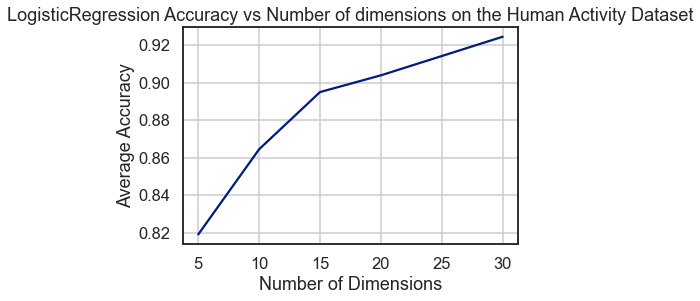

In [131]:
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.grid(True)

# Question 7
Use a different scaler (MinMaxScaler) and try the PCA and observe how the Average accuracy changes with dimension count

In [140]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# From the previous question build the code for this question
def get_avg_score(n):
    pipe = [('scaler', MinMaxScaler()), 
           ('pca', PCA(n_components=n)), 
           ('log_reg', LogisticRegression(solver='newton-cg'))]
    pipe = Pipeline(pipe)
    scores= []

       
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    return np.mean(scores)


ns = [5, 10, 15, 20, 30]
score_list2 = [get_avg_score(n) for n in ns]

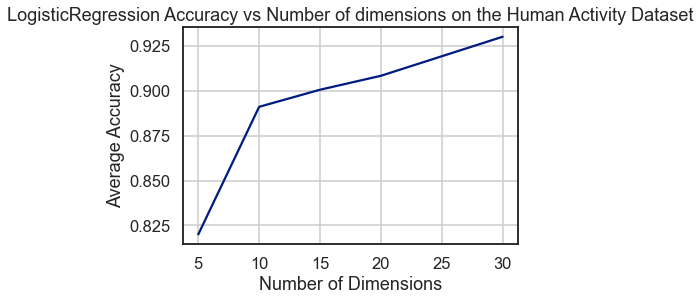

In [141]:
# Plot the Average Accuracy to Number of Dimensions
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list2)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.grid(True)

# Question 8

Use Randomized PCA and draw your observations on how the Average Accuracy changed with number of Dimensions

In [144]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# From the previous question build the code for this question
def get_avg_score(n):
    pipe = [('scaler', MinMaxScaler()), 
           ('pca', PCA(n_components=n, svd_solver='randomized', whiten=True)), 
           ('log_reg', LogisticRegression(solver='newton-cg'))]
    pipe = Pipeline(pipe)
    scores= []

       
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    return np.mean(scores)


ns = [5, 10, 15, 20, 30]
score_list3 = [get_avg_score(n) for n in ns]

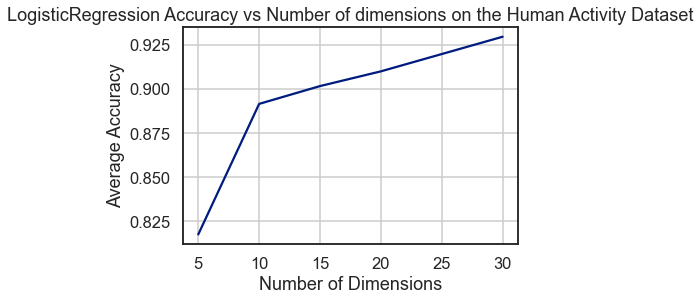

In [145]:
# Plot the average accuracy against the number of Dimensions
# Plot the Average Accuracy to Number of Dimensions
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list3)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.grid(True)

# Question 9
Try using Robust Scaler and try the PCA and observe how the Average accuracy changes with dimension count

In [149]:

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# From the previous question build the code for this question
def get_avg_score(n):
    pipe = [('scaler', RobustScaler()), 
           ('pca', PCA(n_components=n, svd_solver='randomized', whiten=True)), 
           ('log_reg', LogisticRegression(solver='newton-cg'))]
    pipe = Pipeline(pipe)
    scores= []

       
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        y_pred = pipe.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))
    return np.mean(scores)


ns = [5, 10, 15, 20, 30]
score_list4 = [get_avg_score(n) for n in ns]

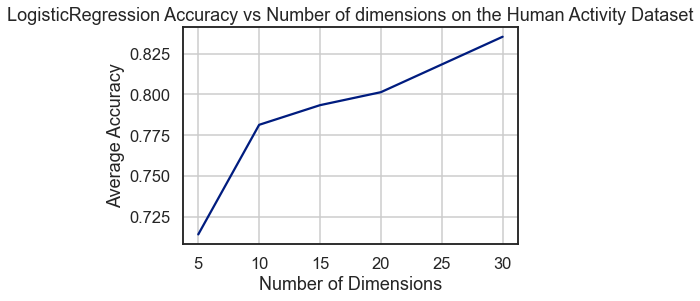

In [150]:
# Plot the average accuracy against the number of Dimensions
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list4)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.grid(True)